
# <span style="color:rgb(213,80,0)">Comparison of rho functions in terms of bdp.</span>

This file creates Figures 2.14 and 2.15.

## Prepare the input for Figure 2.14

In [1]:
bdp=0.01:0.01:0.5;
tol=1e-3;

EFF=zeros(length(bdp),5);
for j=1:length(bdp)
    %TB
    bj=bdp(j);
    cj=TBbdp(bj,1);
    [TBbdpj,TBeffj]=TBc(cj,1);
    if abs(bj-TBbdpj)>tol
        error('bdp not correct')
    end

    %HAMPEL
    % coe=[1.5,3.5,8];
    coe=[2,4,8];
    cj=HAbdp(bj,1,coe);
    [HAbdpj,HAeffj]=HAc(cj,1,'param',coe);
    if abs(bj-HAbdpj)>tol
        error('bdp not correct')
    end

    % OPTIMAL
    cj=OPTbdp(bj,1);
    [OPTbdpj,OPTeffj]=OPTc(cj,1);
    if abs(bj-OPTbdpj)>tol
        error('bdp not correct')
    end

    cj=PDbdp(bj);
    [PDbdpj,PDeffj]=PDc(cj);
    if abs(bj-PDbdpj)>tol
        error('bdp not correct')
    end

    k=4.5;
    cj=HYPbdp(bj,1,k,0);
    [HYPbdpj,HYPeffj]=HYPc(cj,1,'k',k);
    if abs(bj-HYPbdpj)>tol*1000
        disp('bdp not correct')
        HYPeffj=NaN;
    end

    EFF(j,:)=[TBeffj, HAeffj, OPTeffj, PDeffj HYPeffj] ;
end

Effective tolerance in routine HYPbdp=6.6438
Effective tolerance in routine HYPbdp=2.8219
Effective tolerance in routine HYPbdp=1.5479
Effective tolerance in routine HYPbdp=0.91095
Effective tolerance in routine HYPbdp=0.52876
Effective tolerance in routine HYPbdp=0.27397
Effective tolerance in routine HYPbdp=0.091971
Effective tolerance in routine HYPbdp=2.519e-06
Effective tolerance in routine HYPbdp=1.6731e-07

## Create Figure 2.14

Breakdown point and efficiency as parameters vary for five rho functions: TB Tukey biweight; HA Hampel; OPT optimal, PD power divergence and HYP hyperbolic. The inset is a zoom of the main figure for high breakdown point



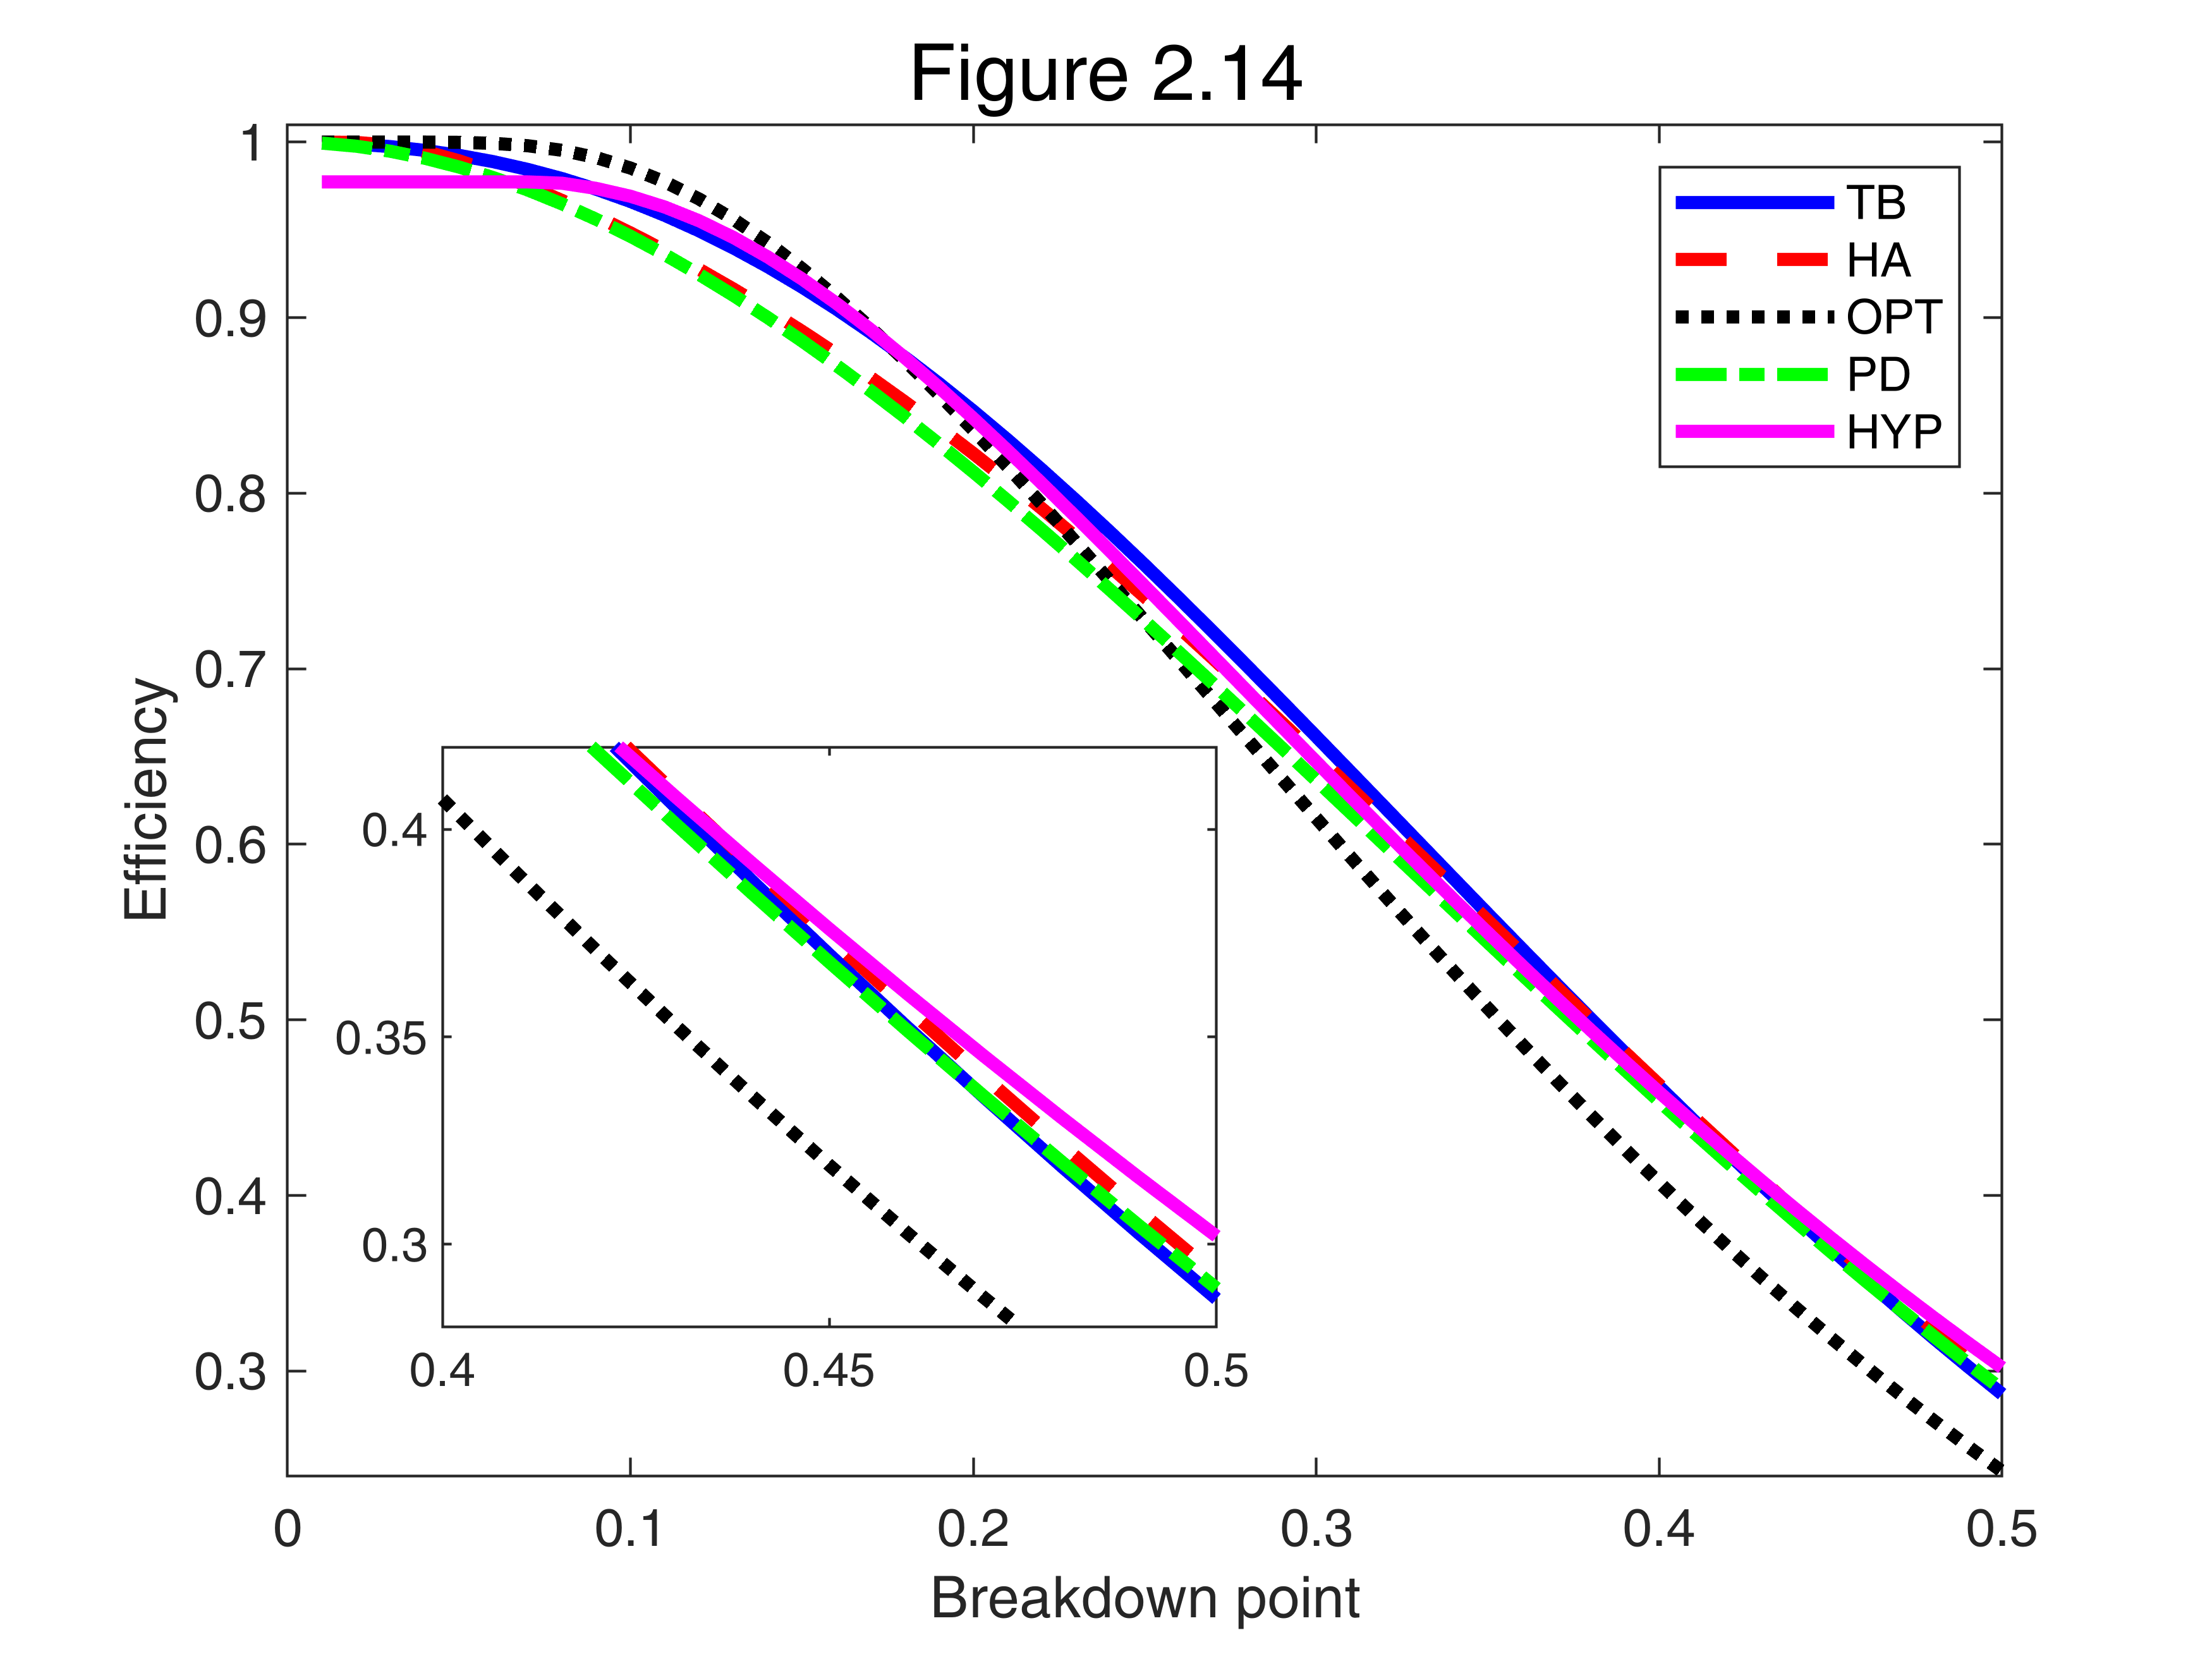

In [2]:
close all
lwd=2.5;
slintyp={'-';'--';':';'-.';'-'};
col={'b';'r';'k';'g';'m'};
plot1=plot(bdp,EFF,'LineWidth',lwd);
set(plot1,{'LineStyle'},slintyp)
set(plot1,{'Color'},col)
xlabel('Breakdown point')
ylabel('Efficiency')
legend({'TB','HA', 'OPT', 'PD' 'HYP'})

ylim([0.24 1.01])

axes('Position',[.2 .2 .35 .35])
plot1=plot(bdp,EFF,'LineWidth',lwd);
set(plot1,{'LineStyle'},slintyp)
set(plot1,{'Color'},col)
xlim([0.4 0.5])
ylim([0.28 0.42])

box on

prin=0;
if prin==1
    % print to postscript
    print -depsc MD4.eps;
else
    sgtitle('Figure 2.14')
    set(gcf,"Name",'Figure 2.14')
end

## Prepare input for Figure 2.15

Breakdown point and efficiency as parameters vary for the Hampel and Hyperbolic rho functions.


In [3]:
bdp=(0.01:0.01:0.5)';

EFF=zeros(length(bdp),5);
for j=1:length(bdp)
    bj=bdp(j);
    %HAMPEL
    coe=[2,4,8];
    cj=HAbdp(bj,1,coe);
    [HAbdpj20,HAeffj20]=HAc(cj,1,'param',coe);
    if abs(bj-HAbdpj20)>tol
        error('bdp not correct')
    end

    coe=[1.5,3.5,8];
    cj=HAbdp(bj,1,coe);
    [HAbdpj15,HAeffj15]=HAc(cj,1,'param',coe);
    if abs(bj-HAbdpj15)>tol
        error('bdp not correct')
    end

    k=4;
    cj=HYPbdp(bj,1,k,0);
    [HYPbdpj,HYPeffj40]=HYPc(cj,1,'k',k);
    if abs(bj-HYPbdpj)>tol*1000
        disp('bdp not correct')
        HYPeffj40=NaN;
    end

    k=4.5;
    cj=HYPbdp(bj,1,k,0);
    [HYPbdpj,HYPeffj45]=HYPc(cj,1,'k',k);
    if abs(bj-HYPbdpj)>tol*1000
        disp('bdp not correct')
        HYPeffj45=NaN;
    end

    k=6;
    cj=HYPbdp(bj,1,k,0);
    [HYPbdpj,HYPeffj60]=HYPc(cj,1,'k',k);
    if abs(bj-HYPbdpj)>tol*1000
        disp('bdp not correct')
        HYPeffj60=NaN;
    end

    EFF(j,:)=[HAeffj20 HAeffj15 HYPeffj40 HYPeffj45 HYPeffj60];
end

Effective tolerance in routine HYPbdp=7.3728
Effective tolerance in routine HYPbdp=6.6438
Effective tolerance in routine HYPbdp=5.3568
Effective tolerance in routine HYPbdp=3.1864
Effective tolerance in routine HYPbdp=2.8219
Effective tolerance in routine HYPbdp=2.1784
Effective tolerance in routine HYPbdp=1.7909
Effective tolerance in routine HYPbdp=1.5479
Effective tolerance in routine HYPbdp=1.1189
Effective tolerance in routine HYPbdp=1.0932
Effective tolerance in routine HYPbdp=0.91095
Effective tolerance in routine HYPbdp=0.5892
Effective tolerance in routine HYPbdp=0.67456
Effective tolerance in routine HYPbdp=0.52876
Effective tolerance in routine HYPbdp=0.27136
Effective tolerance in routine HYPbdp=0.39546
Effective tolerance in routine HYPbdp=0.27397
Effective tolerance in routine HYPbdp=0.059468
Effective tolerance in routine HYPbdp=0.19611
Effective tolerance in routine HYPbdp=0.091971
Effective tolerance in routine HYPbdp=0.046598
Effective tolerance in routine HYPbdp=2.51

## Create Figure 2.15


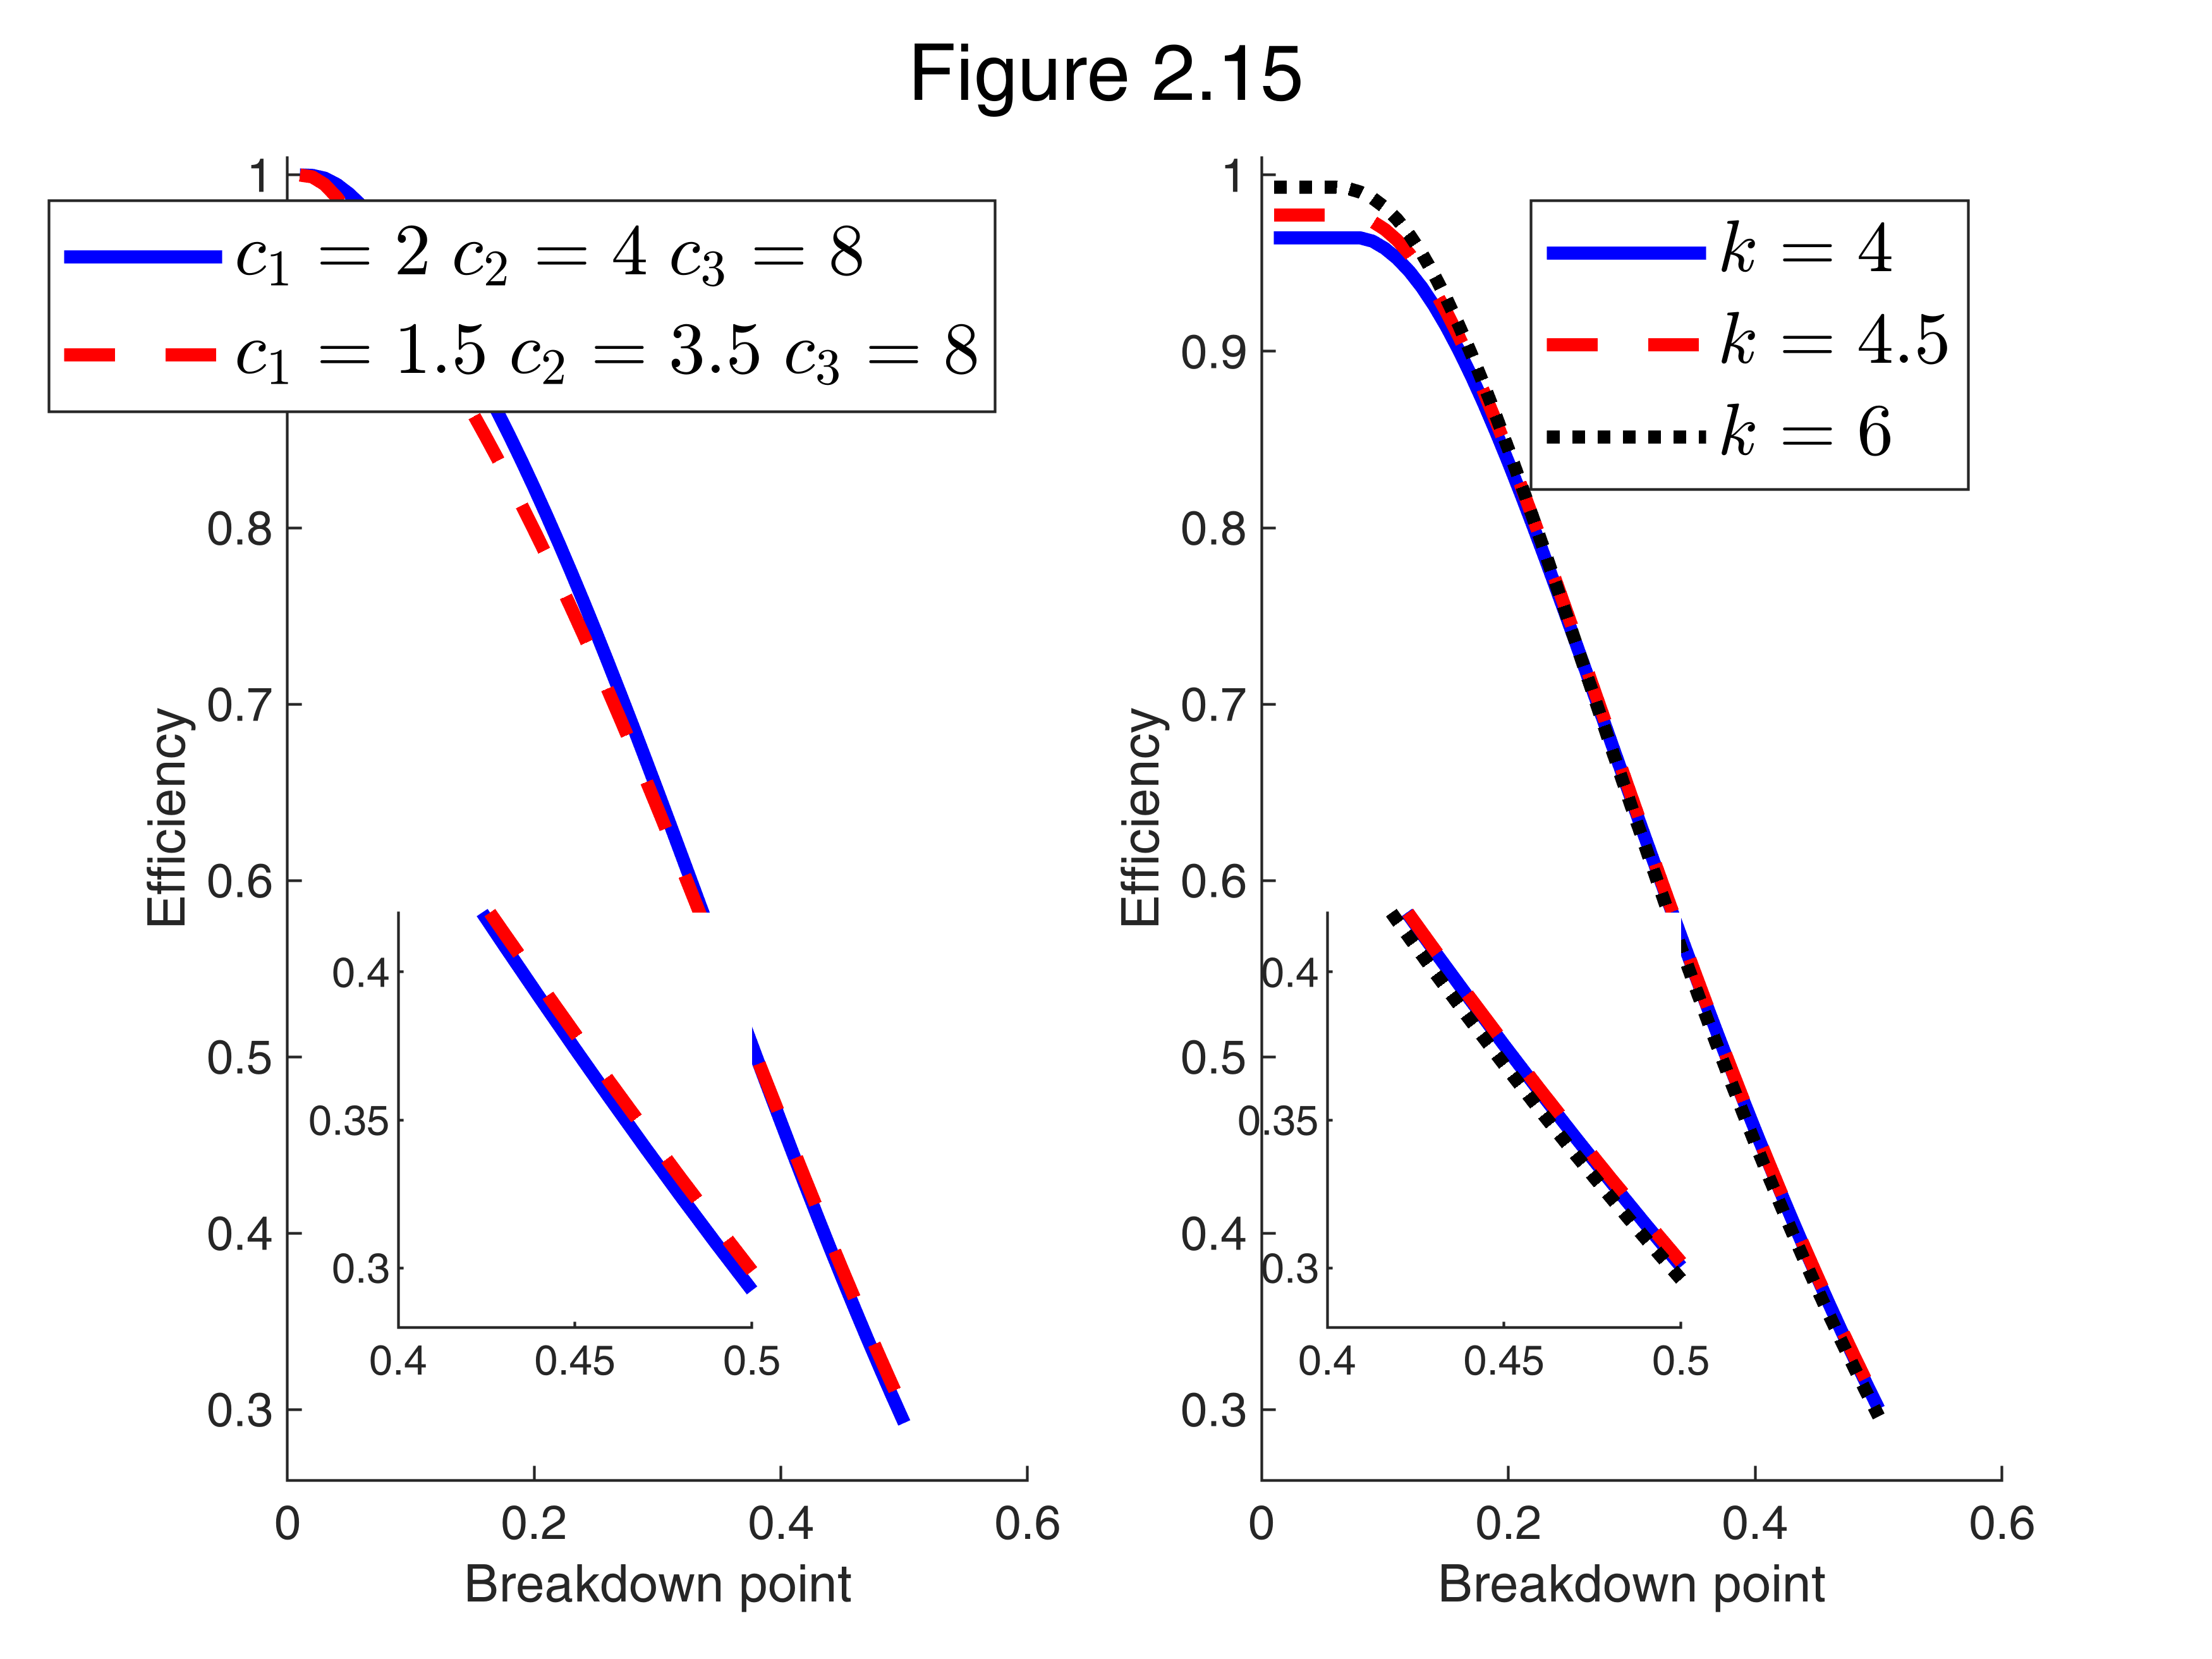

In [4]:
figure
lwd=2.5;
subplot(1,2,1)
hold('on')
plot(bdp,EFF(:,1),'LineWidth',lwd,'Color','b','LineStyle','-');

plot(bdp,EFF(:,2),'LineWidth',lwd,'Color','r','LineStyle','--');
legend({' $c_1=2 \; c_2=4 \; c_3=8$ ', ' $c_1=1.5 \; c_2=3.5 \; c_3=8$ '},...
    'Interpreter','latex','FontSize',14)

xlabel('Breakdown point')
ylabel('Efficiency')
ylim([0.26 1.01])
axes('Position',[.18 .2 .16 .25])
hold('on')
plot(bdp',EFF(:,1),'LineWidth',lwd,'Color','b','LineStyle','-');
plot(bdp',EFF(:,2),'LineWidth',lwd,'Color','r','LineStyle','--');
xlim([0.4 0.5])
ylim([0.28 0.42])

subplot(1,2,2)
hold('on')
plot(bdp,EFF(:,3),'LineWidth',lwd,'Color','b','LineStyle','-');
plot(bdp,EFF(:,4),'LineWidth',lwd,'Color','r','LineStyle','--');
plot(bdp,EFF(:,5),'LineWidth',lwd,'Color','k','LineStyle',':');

legend({' $k=4$ ', ' $k=4.5$ ', ' $k=6$ '},...
    'Interpreter','latex','FontSize',14)

xlabel('Breakdown point')
ylabel('Efficiency')
ylim([0.26 1.01])

axes('Position',[.6 .2 .16 .25])
hold('on')
plot(bdp',EFF(:,3),'LineWidth',lwd,'Color','b','LineStyle','-');
plot(bdp',EFF(:,4),'LineWidth',lwd,'Color','r','LineStyle','--');
plot(bdp',EFF(:,5),'LineWidth',lwd,'Color','k','LineStyle',':');
xlim([0.4 0.5])
ylim([0.28 0.42])

prin=0;
if prin==1
    % print to postscript
    print -depsc MD4bis.eps;
else
    sgtitle('Figure 2.15')
    set(gcf,"Name",'Figure 2.15')
end

In [5]:


%InsideREADME